In [18]:
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/shifting-seas-ocean-climate-and-marine-life-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\josep\.cache\kagglehub\datasets\atharvasoundankar\shifting-seas-ocean-climate-and-marine-life-dataset\versions\1


In [20]:
df = pd.read_csv("realistic_ocean_climate_dataset.csv")

In [21]:
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


In [22]:
X = df.drop(["Date", "Location", "Longitude", "Bleaching Severity", "Marine Heatwave", "Species Observed"], axis = 1).dropna()

y = df["Species Observed"]

<Axes: xlabel='pH Level', ylabel='Species Observed'>

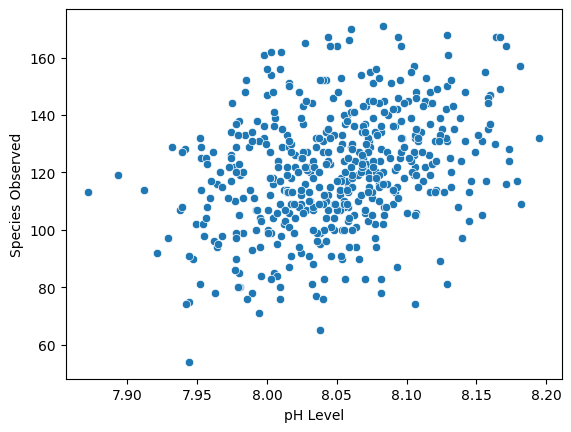

In [25]:
sns.scatterplot(data=df, x="pH Level", y="Species Observed")

In [23]:
multi_linear = LinearRegression().fit(X, y)
multi_coefs = pd.DataFrame(multi_linear.coef_, index=X.columns, columns=["beta_value"])
multi_coefs

,beta_value
Latitude,-0.012602
SST (°C),-10.031254
pH Level,-12.115552


<Axes: >

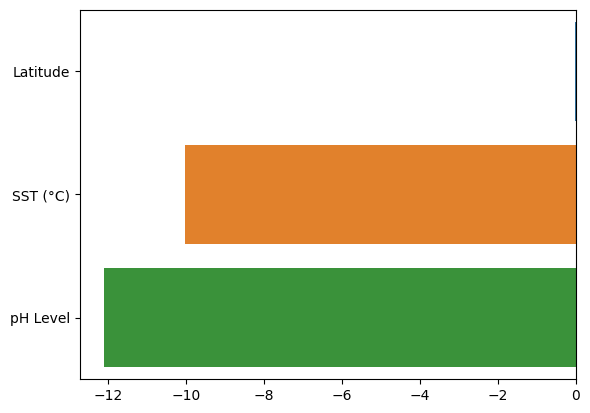

In [24]:
sns.barplot(data=multi_coefs.T, orient='h')

<Axes: >

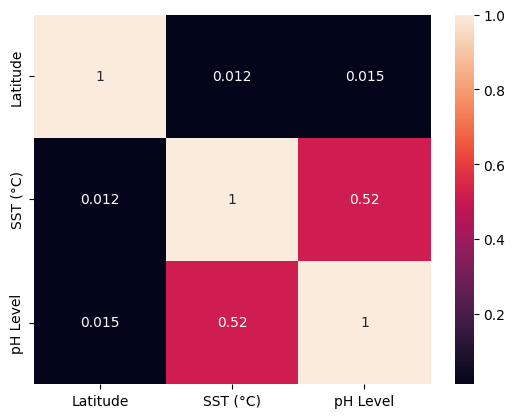

In [28]:
corrMatrix = df[["Latitude", "SST (°C)", "pH Level"]].corr().abs()
sns.heatmap(corrMatrix, annot=True)